<a href="https://colab.research.google.com/github/Saeif-Saleh/Banking-System/blob/master/Classify_different_antennas_2450_175_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!nvidia-smi
# !pip install --upgrade tensorflow


Tue Mar 24 15:18:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/R2450_175_4.mat')

In [9]:
print(list(matlab_data.keys())[3:])

['R2450_T2450_test', 'R2450_T2450_train', 'R2450_T500_test', 'R2450_T500_train', 'R2450_T900_test', 'R2450_T900_train', 'R2450_Tlime_test', 'R2450_Tlime_train']


In [0]:
train_900=matlab_data['R2450_T900_train']
train_2450=matlab_data['R2450_T2450_train']
train_500=matlab_data['R2450_T500_train']
train_lime=matlab_data['R2450_Tlime_train']


In [11]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(80964360, 2)
(81362077, 2)
(79670780, 2)


In [0]:
# test_900=matlab_data['R2450_T900_test']
# test_2450=matlab_data['R2450_T2450_test']
# test_500=matlab_data['R2450_T500_test']

In [0]:
# print(test_900.shape)
# print(test_2450.shape)
# print(test_500.shape)

In [14]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(80964360, 2)
(81362077, 2)
(79670780, 2)


In [0]:
#Slicing data to be divisible by 2**n 
# train_900=train_900[1000000:5194304]
# train_2450=train_2450[1000000:5194304]
# train_500=train_500[1000000:5194304]

train_900=train_900[:41943040]
train_2450=train_2450[:41943040]
train_500=train_500[:41943040]
train_lime=train_lime[:41943040]







In [16]:
#Concatenate training and test data
train_x=np.concatenate((train_900,train_2450,train_500),axis=0)

print(train_x.shape)



(125829120, 2)


In [0]:
# test_900=test_900[1000000:9388608]
# test_2450=test_2450[1000000:9388608]
# test_500=test_500[1000000:9388608]

# test_x=np.concatenate((test_900,test_2450,test_500),axis=0)
# print(test_x.shape)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

Using TensorFlow backend.


In [0]:
n_classes=4
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
# test_x=test_x.reshape(-1,2,sample_size)

In [0]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:3*seprator]=2
train_y[3*seprator:]=3
#Creating test_y
# test_y=np.zeros(len(test_x))
# seprator=int(len(test_y)/n_classes)
# test_y[0:seprator]=0
# test_y[seprator:2*seprator]=1
# test_y[2*seprator:3*seprator]=2


In [22]:
print(train_x.shape)
print(train_y.shape)

(983040, 2, 128)
(983040,)


In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
# test_y=tf.keras.utils.to_categorical(
#     test_y,
#     num_classes=n_classes,
#     dtype='float32'
# )

In [24]:
print(train_x.shape)
print(train_y.shape)

(983040, 2, 128)
(983040, 4)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
# test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [26]:
print(train_x.shape)
print(train_y.shape)

(983040, 128, 2, 1)
(983040, 4)


In [0]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.25, shuffle= True)


In [28]:
train_x.shape

(737280, 128, 2, 1)

In [29]:
test_x.shape

(245760, 128, 2, 1)

In [0]:
train_x, valid_x, train_y,valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)

In [31]:
print(train_x.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)
print(test_x.shape)
print(test_y.shape)

(589824, 128, 2, 1)
(589824, 4)
(147456, 128, 2, 1)
(147456, 4)
(245760, 128, 2, 1)
(245760, 4)


In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(4))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [33]:
conv_model=create_model()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [34]:
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=50)

Train on 589824 samples, validate on 147456 samples
Epoch 1/50
589824/589824 [==============================] - 164s 278us/sample - loss: 1.2752 - acc: 0.3912 - val_loss: 1.2331 - val_acc: 0.4378
Epoch 2/50
589824/589824 [==============================] - 157s 266us/sample - loss: 1.2377 - acc: 0.4061 - val_loss: 1.2081 - val_acc: 0.4375
Epoch 3/50
589824/589824 [==============================] - 155s 263us/sample - loss: 0.6756 - acc: 0.6986 - val_loss: 0.4739 - val_acc: 0.7944
Epoch 4/50
589824/589824 [==============================] - 156s 265us/sample - loss: 0.5418 - acc: 0.7628 - val_loss: 0.4600 - val_acc: 0.8123
Epoch 5/50
589824/589824 [==============================] - 156s 264us/sample - loss: 0.5255 - acc: 0.7705 - val_loss: 0.4984 - val_acc: 0.8127
Epoch 6/50
589824/589824 [==============================] - 155s 263us/sample - loss: 0.5156 - acc: 0.7747 - val_loss: 0.4255 - val_acc: 0.8124
Epoch 7/50
589824/589824 [==============================] - 155s 263us/sample - loss

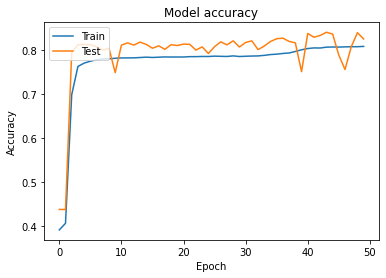

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

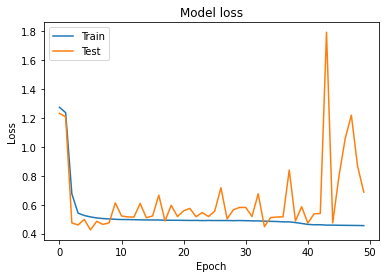

In [36]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


In [38]:
conv_model.evaluate(test_x,test_y)

245760/245760 [==============================] - 19s 79us/sample - loss: 0.7414 - acc: 0.8266


[0.7413909517015175, 0.8265584]

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))


Figure(720x504)


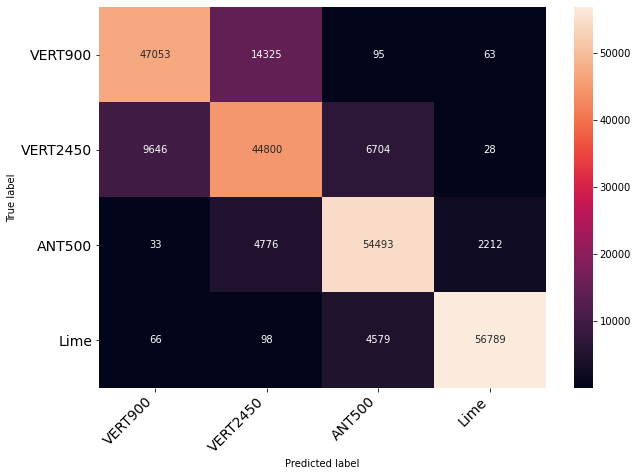

In [42]:
print(print_confusion_matrix(matrix,['VERT900','VERT2450','ANT500','Lime']))

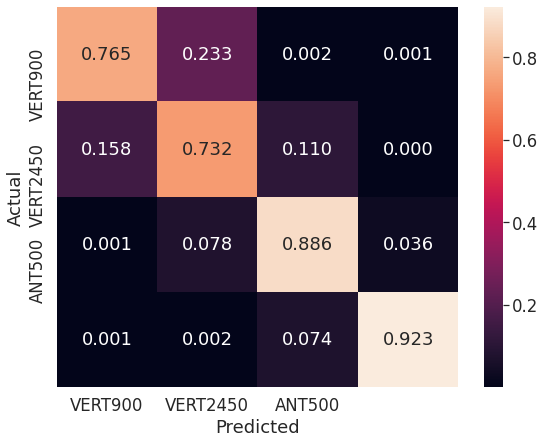

In [43]:
target_names='VERT900','VERT2450','ANT500,'
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cmn, annot=True, fmt='.3f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

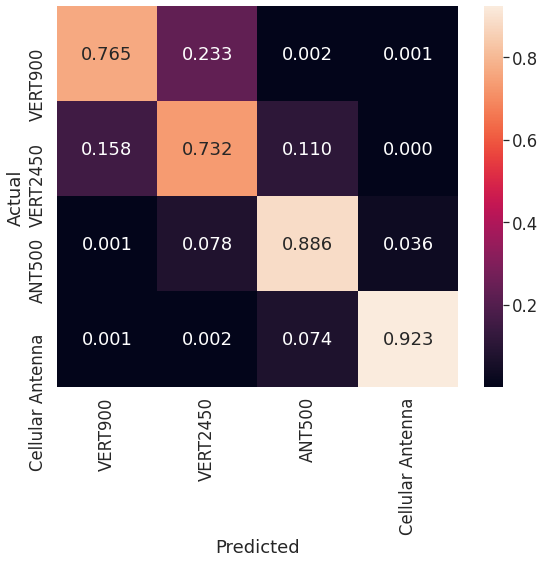

In [48]:
target_names='VERT900','VERT2450','ANT500','Cellular Antenna'
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cmn, annot=True, fmt='.3f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [49]:
from sklearn.metrics import classification_report

print('\033[1m'+classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

                  precision    recall  f1-score   support

         VERT900       0.83      0.76      0.80     61536
        VERT2450       0.70      0.73      0.72     61178
          ANT500       0.83      0.89      0.86     61514
Cellular Antenna       0.96      0.92      0.94     61532

        accuracy                           0.83    245760
       macro avg       0.83      0.83      0.83    245760
    weighted avg       0.83      0.83      0.83    245760



In [0]:
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=25)

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
print('\033[1m'+classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

In [0]:
while True:
  pass